In [73]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: none)
ERROR: No matching distribution found for tensorflow-gpu

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
!pip list

Package                      Version
---------------------------- ----------
absl-py                      2.0.0
altair                       5.2.0
annotated-types              0.5.0
anyio                        3.7.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        23.1.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
blinker                      1.7.0
cachetools                   5.3.1
certifi                      2023.5.7
cffi                         1.15.1
charset-normalizer           3.1.0
click                        8.1.3
colorama                     0.4.6
colour                       0.1.5
comm                         0.1.3
comtypes                     1.1.14
contourpy                    1.1.0
cycler                       0.11.0
dacite                       1.8.1
deb


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [76]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [77]:
import cv2
import imghdr

In [78]:
data_dir = r'C:\Users\Shubham Kumar\ML campusx\projects\sentiment anlaysis\Data'

In [79]:
# os.listdir(data_dir)
os.listdir(os.path.join(data_dir,'happy'))

['-businesspeople-choose-you-for-employment-or-recruitment-illustration-vector.jpg',
 '-in-svg-png-gif-file-formats--group-crowd-smiling-pack-illustrations-6983306.png',
 '00a0bc159da630cc519a934813c56f6f938db28ff7efcf78efbb266c26b6c734543abaa_1920.png',
 '05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '170404-happy-workers-feature.jpg',
 '1d55871e15f52cc1fb5854adce08c51e6a274575be5b1586778b08165c0d085846c7061_1920.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '35439_hd.jpg',
 '360_F_498729118_RiwWjhYDF4LgfnfEL0WCh6Ls4oh0cHPV.jpg',
 '383627315.jpg',
 '56f455011e0000b300705475.jpeg',
 '9-not-need-happy.jpg',
 '960x0.jpg',
 'a-happy-mixed-race-family-of-three-relaxing-in-the-lounge-and-being-playful-together-loving.jpg',
 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg',
 'afterglow.png',
 'ai-generated-8528080_1280.jpg',
 'ai-generated-8528080_640.jpg',
 'asia-1807504_640.jpg',
 'balloons-7658766_1280.jpg',
 'beauti

In [80]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [81]:
img = cv2.imread(os.path.join(data_dir, 'happy', 'smile.woman_.jpg'))

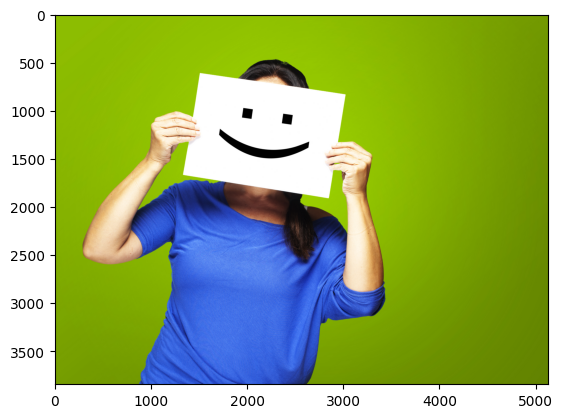

In [82]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [83]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Load Data

In [84]:
import numpy as np
from matplotlib import pyplot as plt

In [85]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 647 files belonging to 2 classes.


In [86]:
data_iterator = data.as_numpy_iterator()

In [87]:
batch = data_iterator.next()

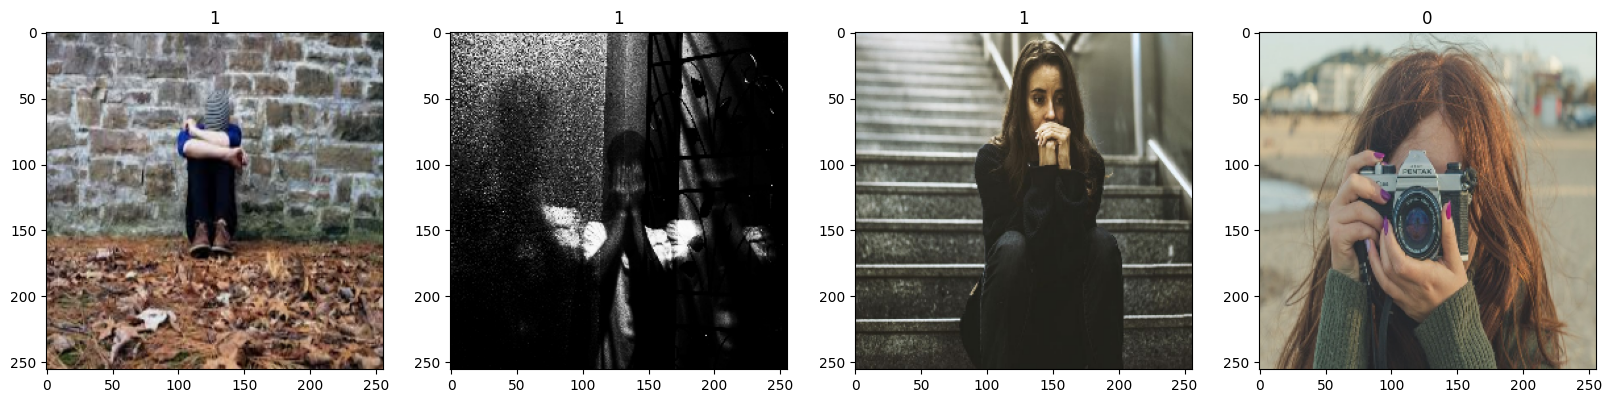

In [88]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocess Data

In [89]:
# scaling the data
data = data.map(lambda x,y: (x/255, y)) 

In [90]:
data.as_numpy_iterator().next()

(array([[[[7.37254918e-01, 8.15686285e-01, 8.50980401e-01],
          [7.37254918e-01, 8.15686285e-01, 8.50980401e-01],
          [7.38030434e-01, 8.16461802e-01, 8.43912780e-01],
          ...,
          [5.66534519e-01, 6.10162020e-01, 6.67514920e-01],
          [3.70961636e-01, 4.05275345e-01, 4.41059679e-01],
          [4.26162302e-01, 4.03540522e-01, 4.99004275e-01]],
 
         [[7.45098054e-01, 8.23529422e-01, 8.50980401e-01],
          [7.45098054e-01, 8.23529422e-01, 8.50980401e-01],
          [7.45588243e-01, 8.24509799e-01, 8.50980401e-01],
          ...,
          [5.91542184e-01, 6.11795366e-01, 6.86289847e-01],
          [3.86718750e-01, 3.87729794e-01, 4.35154349e-01],
          [4.53578800e-01, 3.97727102e-01, 4.96614575e-01]],
 
         [[7.48667300e-01, 8.31020236e-01, 8.43489587e-01],
          [7.49019623e-01, 8.31372559e-01, 8.43841910e-01],
          [7.49509811e-01, 8.31862748e-01, 8.45224440e-01],
          ...,
          [5.95362306e-01, 6.12574697e-01, 6.9805

In [91]:
# split Data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [92]:
train_size

14

In [93]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [94]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [96]:
model = Sequential()

In [97]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [98]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# Train

In [100]:
logdir='logs'

In [101]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [102]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 [==============================] - 25s 2s/step - loss: 0.7035 - accuracy: 0.5647 - val_loss: 0.6515 - val_accuracy: 0.5391
Epoch 2/20
14/14 [==============================] - 36s 2s/step - loss: 0.5941 - accuracy: 0.6696 - val_loss: 0.5208 - val_accuracy: 0.7500
Epoch 3/20
14/14 [==============================] - 15s 943ms/step - loss: 0.5235 - accuracy: 0.7455 - val_loss: 0.5011 - val_accuracy: 0.7500
Epoch 4/20
14/14 [==============================] - 15s 928ms/step - loss: 0.4714 - accuracy: 0.7701 - val_loss: 0.4208 - val_accuracy: 0.8359
Epoch 5/20
14/14 [==============================] - 15s 932ms/step - loss: 0.3605 - accuracy: 0.8438 - val_loss: 0.3000 - val_accuracy: 0.8984
Epoch 6/20
14/14 [==============================] - 15s 933ms/step - loss: 0.2751 - accuracy: 0.9040 - val_loss: 0.2919 - val_accuracy: 0.9062
Epoch 7/20
14/14 [==============================] - 15s 936ms/step - loss: 0.2354 - accuracy: 0.9107 - val_loss: 0.1933 - val_accuracy: 0.9531
Epoch

# Plot Performance

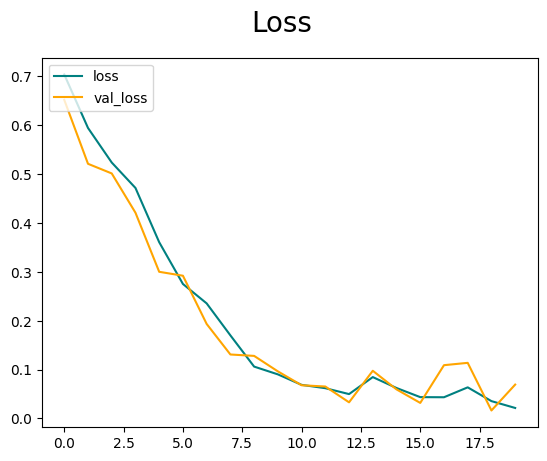

In [103]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

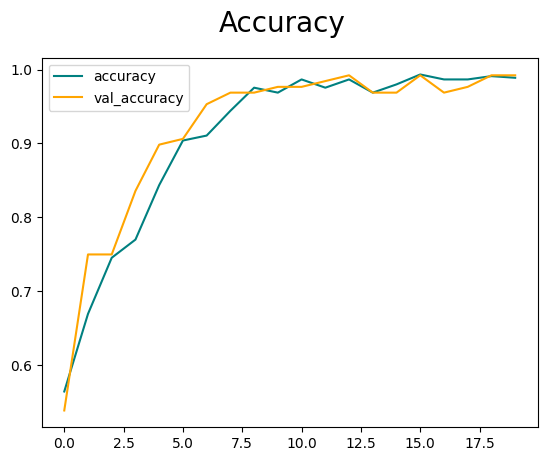

In [104]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [105]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [106]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [107]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 96ms/step


In [108]:
print(f'Precision : {pre.result().numpy()},Recall:{re.result().numpy()},Accuracy :{pre.result().numpy()}')

Precision : 1.0,Recall:1.0,Accuracy :1.0


# Test

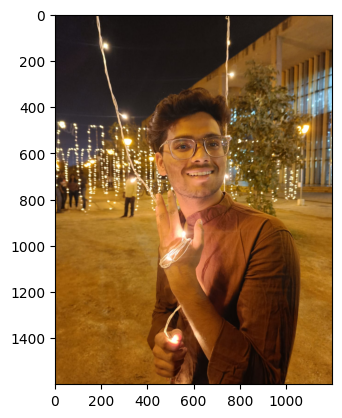

In [159]:
data_dir = r'C:\Users\Shubham Kumar\ML campusx\projects\sentiment anlaysis\Test'
img = cv2.imread(os.path.join(data_dir, 'shubham.jpg'))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

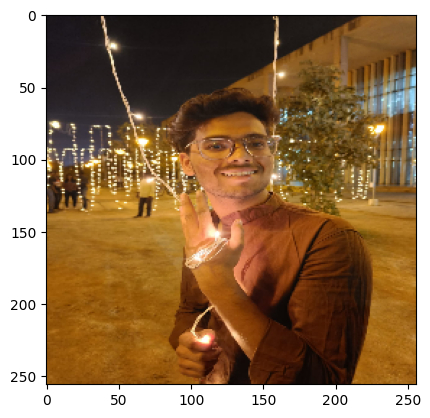

In [160]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [161]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


In [162]:
yhat

array([[0.0036664]], dtype=float32)

In [163]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# Save the Model

In [164]:
from tensorflow.keras.models import load_model

In [165]:
model.save(os.path.join('models','imageclassifier.h5'))

In [166]:
new_model = load_model(r'C:\Users\Shubham Kumar\ML campusx\projects\sentiment anlaysis\models\imageclassifier.h5')

In [157]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 80ms/step


In [158]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
